In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$\eta = \dfrac{B-\sqrt{B^2 - 4AC}}{2A}$

$A = \alpha_A + \Lambda_T $

$B = 2\alpha_A + \dfrac{\Gamma_{Phot}}{n_H} + \Lambda_T$

$C = \alpha_A$

In [2]:
def LamdaT(T): # cm3/s Equation A6, Rahmati et al 2013
    return 1.17E-10 * T**(0.5) * exp(-157809/T) / ( 1 + sqrt(T/10**5))

def alphaA(T): # cm3 / s Equation A3
    l = 315614/T
    return 1.269E-13 * l**(1.503) / ( 1 + (l/0.522)**(0.47) )**1.923 

def Gammaphot(GammaUVB, nh, NHSSH):
    Gammap =  GammaUVB * ( 0.98 *  (  1 + ( nh  / NHSSH )**(1.64) )**(-2.28) + 0.22 * ( 1 + nh  / NSSH)**(-0.84) )
    return Gammap

def Eta(A, B, C):
    eta = ( B - sqrt(B**2 - 4*A*C) ) / (2*A)
    return eta 

def tvir(M, z):
    T = 2554 * ( M / 1E6)**(2/3.) * ( (1 + z) / 31.0 )
    return T


In [3]:
# Temperatre
z = 6
M = 1E8
T = tvir(M, z)
NSSH = 4.0E-3 # See table 2 of Rahmati et al 2013
GUVB = 4.5E-13 # See table 2 of Rahmati et al 2013

print " ---------- Parameters -----------"
print "z = ", z
print "Halo mass = ", M
print "NSSh = ", NSSH
print "Gamma_UVB = ", GUVB
print "----------------------------------"

 ---------- Parameters -----------
z =  6
Halo mass =  100000000.0
NSSh =  0.004
Gamma_UVB =  4.5e-13
----------------------------------


In [4]:
def ABC(T, G, nh, NSSH):
    a_A = alphaA(T)
    LT = LamdaT(T)
    GPhot = Gammaphot(G, nh, NSSH)
    A = a_A + LT
    B = 2*a_A + GPhot / nh + LT
    C = a_A
    return A, B, C
T1 = tvir(1E6, 3)
T2 = tvir(1E8, 3)

A, B, C = ABC(T1, GUVB, 0.001, NSSH)
eta = Eta(A, B, C)

print eta

0.00920935524268


In [5]:
N = 1000
nh = logspace(-6, 2, N)
T = linspace(100, 1E7, N)

print nh[0]

1e-06


In [10]:
A = zeros(N)
B = zeros(N)
C = zeros(N)
A2 = zeros(N)
B2 = zeros(N)
C2 = zeros(N)
A3 = zeros(N)
B3 = zeros(N)
C3 = zeros(N)
A4 = zeros(N)
B4 = zeros(N)
C4 = zeros(N)
E = zeros(N)
E2 = zeros(N)
E3 = zeros(N)
E4 = zeros(N)

for i in range(N):
    A[i], B[i], C[i] = ABC(T1, GUVB, nh[i], NSSH)
    A2[i], B2[i], C2[i] = ABC(T2, GUVB, nh[i], NSSH)
    A3[i], B3[i], C3[i] = ABC(T[i], GUVB, 0.01, NSSH)
    A4[i], B4[i], C4[i] = ABC(T[i], GUVB, 0.001, NSSH)
    E[i] = Eta(A[i], B[i], C[i])
    E2[i] = Eta(A2[i], B2[i], C2[i])
    E3[i] = Eta(A3[i], B3[i], C3[i])
    E4[i] = Eta(A4[i], B4[i], C4[i])
    print A[i], B[i], C[i], E[i], nh[i]

4.07886482329e-12 5.39986128012e-07 4.07886482329e-12 7.55364430928e-06 1e-06
4.07886482329e-12 5.30120227262e-07 4.07886482329e-12 7.69423276468e-06 1.01861017016e-06
4.07886482329e-12 5.20434577649e-07 4.07886482329e-12 7.83741701874e-06 1.03756667875e-06
4.07886482329e-12 5.10925885951e-07 4.07886482329e-12 7.98327494542e-06 1.05687597118e-06
4.07886482329e-12 5.01590919113e-07 4.07886482329e-12 8.13185846069e-06 1.07654461284e-06
4.07886482329e-12 4.9242650315e-07 4.07886482329e-12 8.28319352254e-06 1.09657929127e-06
4.07886482329e-12 4.83429522063e-07 4.07886482329e-12 8.43735800493e-06 1.11698681847e-06
4.07886482329e-12 4.74596916786e-07 4.07886482329e-12 8.59437786584e-06 1.13777413322e-06
4.07886482329e-12 4.65925684141e-07 4.07886482329e-12 8.75432448974e-06 1.15894830344e-06
4.07886482329e-12 4.57412875818e-07 4.07886482329e-12 8.91724979261e-06 1.18051652857e-06
4.07886482329e-12 4.49055597375e-07 4.07886482329e-12 9.08320569041e-06 1.20248614204e-06
4.07886482329e-12 4.408

[  1.01356190e-06   1.03242472e-06   1.05157773e-06   1.07121440e-06
   1.09104454e-06   1.11135834e-06   1.13205907e-06   1.15314673e-06
   1.17462132e-06   1.19648284e-06   1.21877965e-06   1.24146339e-06
   1.26453407e-06   1.28808840e-06   1.31202967e-06   1.33645459e-06
   1.36131481e-06   1.38665870e-06   1.41248625e-06   1.43874909e-06
   1.46554396e-06   1.49282249e-06   1.52063305e-06   1.54892727e-06
   1.57770515e-06   1.60711180e-06   1.63700210e-06   1.66747280e-06
   1.69847553e-06   1.73010702e-06   1.76231891e-06   1.79511118e-06
   1.82853222e-06   1.86253365e-06   1.89721221e-06   1.93251953e-06
   1.96850398e-06   2.00511718e-06   2.04245588e-06   2.08047171e-06
   2.11916466e-06   2.15863148e-06   2.19877541e-06   2.23974158e-06
   2.28138487e-06   2.32387457e-06   2.36713813e-06   2.41119973e-06
   2.45605937e-06   2.50178960e-06   2.54834206e-06   2.59576511e-06
   2.64408294e-06   2.69329553e-06   2.74342709e-06   2.79450179e-06
   2.84649545e-06   2.89948061e-06

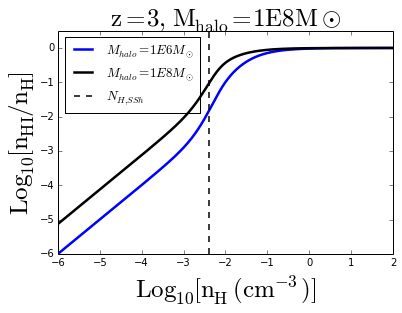

In [8]:
plot(log10(nh), log10(E2), c='b', lw=2.5, label= r"$M_{halo} = 1E6M_{\odot}$")
plot(log10(nh), log10(E), c='k', lw=2.5, label= r"$M_{halo} = 1E8M_{\odot}$")
axvline(log10(0.004), ls='--', c='k', lw=1.5, label = "$N_{H,SSh}$")
legend(loc = 'upper left', fontsize=13)
ylim(-6, 0.5)
title("$\mathrm{z=3,\ M_{halo} = 1E8M\odot}$", fontsize=25)
xlabel("$\mathrm{Log_{10}[n_H (cm^{-3})]}$", fontsize=25)
ylabel("$\mathrm{Log_{10}[n_{HI} / n_{H} ]}$", fontsize=25)
#savefig("etavsnh.png", bbox_inches='tight')
print E2

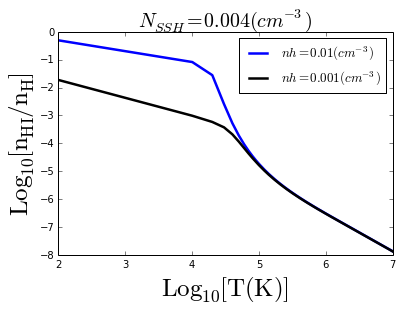

In [33]:
plot(log10(T), log10(E3), c='b', lw=2.5, label= r"$nh = 0.01 (cm^{-3})$")
plot(log10(T), log10(E4), c='k', lw=2.5, label= r"$nh = 0.001 (cm^{-3})$")
legend(loc = 'upper right', fontsize=13)
title("$N_{SSH} = 0.004 (cm^{-3})$", fontsize=20)
xlabel("$\mathrm{Log_{10}[T(K)]}$", fontsize=25)
ylabel("$\mathrm{Log_{10}[n_{HI} / n_{H} ]}$", fontsize=25)
#savefig("etavsT.png", bbox_inches='tight')

In [9]:
import numpy as np
x = [1, 5, 3, 6]
y = np.sort(x)

In [10]:
print y

[1 3 5 6]
